# T033 · Molecular representations

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- [Gerrit Großmann](https://mosi.uni-saarland.de/people/gerrit/), 2022, Saarland University

__Talktorial T033__: This talktorial is part of the TeachOpenCADD pipeline described in the TeachOpenCADD publication (TODO), comprising of talktorials T033 to T038.

## Aim of this talktorial

In this talktorial, we conduct the groundwork for the deep learning talkturials.
Specifically, we learn about molecular representations and find that representing a molecule in a computer is not a trivial task. Differnt representations come with their specific implications and (dis-)advantages.

### Contents in Theory

* What is a molecule?
* Molecular representations
* Molecule representations for humans
* Computer-age molecular representations

### Contents in Practical

* Conformers
* Molecular graphs
* Fingerprints

### References

* Databases: 
  * [UniProt Protein Database](https://www.uniprot.org/)
  * [AlphaFold
Protein Structure Database](https://alphafold.ebi.ac.uk/)
* Papers: 
  * [Molecular representations in AI-driven drug discovery: a review and practical guide](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5#:~:text=Traditionally%2C%20molecules%20are%20represented%20as,of%20chemical%20structures%20in%20cheminformatics.)
  * [A review of molecular representation in the age of machine learning](https://wires.onlinelibrary.wiley.com/doi/full/10.1002/wcms.1603)
  * [Point-based molecular representation learning from conformers](https://openreview.net/pdf?id=pjePBJjlBby)
* Talkturials: 
  * [T008 - Protein data acquisition: Protein Data Bank (PDB)](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T008_query_pdb/talktorial.ipynb)
  * [T017 - Advanced NGLview usage](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T017_advanced_nglview_usage/talktorial.ipynb)
  * Deep larning talkturials T033 to T038
* [Tutorial on chirality](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules)

## Theory

### What is a molecule?

A molecule is a **group of atoms** that are bonded together.
The number of atoms can range from only a few to several thousands (e.g., in proteins or carbohydrates) or even millions (e.g. in DNA molecules). 

The physical force that is most relevant for the formation of molecules from atoms is the **electrostatic force**, which is the force that governs the behavior of charged particles. When atoms interact, their electrons can be attracted to or repelled by the nucleus of the other atoms, leading to the formation of a **chemical bond**.

The formation of molecules gives a group of atoms a characteristic structure and behavior. The property of a molecule emerges in a non-trivial way from (the interplay of) its constituent atoms. Molecules are the building block of living cells and play a key role in the structure and function of living organisms.

In addition to the subdivision into small molecules and macromolecules, the distinction of organic and inorganic molecules is important. Organic molecules are the ones containing carbon-hydrogen or carbon-carbon bonds.
This talkturial focuses and **small** and **organic** molecules. 

<!--- 
![Coffein](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Caffeine_molecule_ball_from_xtal_%281%29.png/671px-Caffeine_molecule_ball_from_xtal_%281%29.png)
--->

![Coffein Molecule](/images/caffeine_molecule.png)

*Figure 1*: 
The image is a representation of a caffeine molecule.
Atoms are shown in gray (carbon), white (hydrogen), red (oxygen), and blue (nitrogen).
An edge between two atoms indicates a covalent chemical bond with one (single line) or two (double line) shared atoms (triple bonds are also possible, but not present in caffeine).
The dashed pentagon indicates a ring structure. Two electrons can move freely around in this ring and are not associated with a specific chemical bond within this ring.

### Molecular representations

If you want to get physically accurate, you have to look at molecules as **complex three-dimensional objects** that are dynamic rather than static and that exhibit quantum mechanical properties. Depending on the task you want to solve, a simplified view on molecules might be helpful. 

In order to apply machine learning to molecules, we need to find a way to 
find a proper **representation**. As it turns out, there are several possibilities, all with their own advantages and disadvantages. 
Choosing a representation of a molecule is tightly connected with the simplifications you are willing to make. They provide the recipe to translate a quantum-mechanical object to a mathematical description. 
But before we discuss computational representation of molecules, we first want to give a recap on pre-computer-age techniques to represent molecules.

### Molecule representations for humans

Without being able to represent molecules, it is also impossible to discuss them and communicate with them. We start with representations and visualizations that are intuitive **for humans**. Later, we will also look at "**computer-age**" encodings, suitable as input for deep-learning systems. However, note that this classification is somewhat arbitrary. 

**Text-Based:**

The easiest way to identify a molecule is its **trivial name**. For example, caffeine or aspirin. This is only possible for well-known molecules.

Alternatively, the **IUPAC nomenclature of organic chemistry** can be used (there is also one for inorganic chemistry, which we will skip here). The goal is that each possible organic molecule is associated with a name that is easy to understand that unambiguously identifies the molecule. 
The clarity and consistency of this naming scheme makes it reasonably easy to understand and use. 
However, not all molecules can be named using these rules, for instance, some complex organic molecules, such as those that contain rings with multiple substructures.

**Example:** The caffeine molecule has the IUPAC name: *1,3,7-trimethylpurine-2,6-dione* (TODO: actually WP is ambiguous there????).

**Molecular formula:**

The **molecular formula** (sometimes referred to as Hill formula) is arguably the easiest (and most simplified) way of representing a molecule: You simply count the number of atoms of each type. The ordering (from left to right) is arguably a little bit arbitrary: Carbon atoms are listed first, hydrogen atoms next, and all other atoms follow in alphabetical order.
However, in the unlikely case that the formula does not contain carbon, all atoms (including hydrogen) are listed alphabetically. 

**Example:** For caffeine, the molecular formula is *C8H10N4O2*, indicating that here are 8 carbon (C) atoms, 10 hydrogen (H) atoms, 4 nitrogen (N) atoms, and 2 oxygen (O) atoms present.

Naturally, this does not uniquely identify a molecule. 

**Example:** Molecules with the same molecular formula but with different structural formulas (see next section) are called isomers. Isomers are molecules that have the same number and type of atoms, but they are arranged differently in space, giving them different physical and chemical properties.
One example are [n-butane](https://www.wolframalpha.com/input?i=butane) and [isobutane](https://www.wolframalpha.com/input?i=isobutane). Both have the molecular formula C4H10. 
The atoms in butane are arranged in a straight chain, while the atoms in isobutane are arranged in a branch structure. 

![N-butaneAndIsobutane](/images/butane_and_isobutane.png)

*Figure 2*: 
N-butane and isobutane.

**Visualizations of small molecules:**

Visualizations are the easiest way to get a first impression of a molecule.
In the first example, we have already seen a visualization of caffeine molecule. These types of visualizations are referred to as **Ball and Stick** models.
They are easy to understand but difficult to draw.

2D visualizations are easy to draw and come in many different flavors.

A viable alternative is the **Lewis structure**. It contains no 3D information. Excess electrons that form lone pairs are shown as dots (we skip them here).

Similarly, the **Skeletal formula** (or line-angle formula) removes hydrogen atoms that are next to  carbon atoms and draws carbon atoms only implicitly as bends and ends. 

For comparison, here are the tree visualization of the ethanol molecule (from [WP](https://en.wikipedia.org/wiki/Skeletal_formula)).

<!---
![SimpleMoleculeBallStick](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Ethanol-CRC-MW-trans-3D-balls.png/120px-Ethanol-CRC-MW-trans-3D-balls.png)
![SimpleMoleculeLewis](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Ethanol-structure.svg/150px-Ethanol-structure.svg.png)
![SimpleMoleculeLineAngle](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Ethanol-2D-skeletal.svg/120px-Ethanol-2D-skeletal.svg.png)
--->

![Ethanol visualization](images/ethanol.png)

*Figure 2*: 
Different visualizations of ethanol.


A special feature of this is the **Natta Projection** that provides basic (but not in every case complete) information about the relative positions of the atoms in 3D. For instance, consider the kinase inhibitor from the [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html):


TODO: add image

*   Solid wedges indicate a bond that point out of the plane.
*   Dashed wedges indicate a bond that point into the plane (away from the observer)

You can find the corresponding ball-and-stick plot [here](https://molview.org/?q=C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65).



**Representing proteins:**

Proteins are large molecues that are composed of of building blocks called amino acids.
There are 20 different amino acids. 
A protein is made up of one or more chains of amino acids.
Each chain can be described as a string of characters. Therfore, we identfy each of the amino acids with a [single letter](https://en.wikipedia.org/wiki/Amino_acid#Table_of_standard_amino_acid_abbreviations_and_properties).

The [Pro-thyrotropin-releasing hormone](https://www.uniprot.org/uniprotkb/P20396/entry#sequences) protein is one of the smalles proteins present in the human body. It is comprised of only 242 amino acids:

```
MPGPWLLLALALTLNLTGVPGGRAQPEAAQQEAVTAAEHPGLDDFLRQVERLLFLRENIQ
RLQGDQGEHSASQIFQSDWLSKRQHPGKREEEEEEGVEEEEEEEGGAVGPHKRQHPGRRE
DEASWSVDVTQHKRQHPGRRSPWLAYAVPKRQHPGRRLADPKAQRSWEEEEEEEEREEDL
MPEKRQHPGKRALGGPCGPQGAYGQAGLLLGLLDDLSRSQGAEEKRQHPGRRAAWVREPL
EE
```

However, the amino acid sequence does not contain 3D information, which is importortant for the function. You can predict it, using tools like Alphafold or simply look it up in the [Alphafold database](https://alphafold.ebi.ac.uk/entry/P20396).  


TODO: write sth. about ambiguity. 

**Visualizations of proteins:**

We focus here on small molecules, but still want to point out that large molecules are typically visualized differently, most commonly by a [Ribbon diagram](https://en.wikipedia.org/wiki/Ribbon_diagram).
The idea is to group common motifs together and represent them, for instance with curls (alpha-Helices) or arrows (beta-strands).

<!---
![TubbyProtein](https://upload.wikimedia.org/wikipedia/commons/f/ff/Tubby-1c8z-pymol.png)
--->
![TubbyProtein](images/ribbon_diagram_tubby.png)

*Figure 3*: 
Ribbon diagram of the tubby protein.

TODO: ref to talkturial

### Computer-age molecular representations

When we want to give a molecular description to a computer, we better make sure there is little ambiguity left.
In machine learning, it  is still in an open research question when to use which representation. **Text**-based (or **linear**) and **graph**-based representations are becoming both very widely used. Moreover, **fingerprint** based methods are sometimes a viable alternative, especially for traditional machine learning methods. 


**Text-based representations:**

Text-based representations use a sequence of characters to specify a molecule. This is possible for practically all (small) molecules relevant in practice. Here, we discuss SMILES, InChI, and SELFIES. For a deeper dive, we refer the reader to the SMILES talkturial. (TODO: link)



**SMILES** (Simplified Molecular Input Line Entry Specification) is the most widely used text-based representation and can be handled by all common frameworks. When we specify a molecule in RDKit, we often used SMILES notation: 

`mol = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C") `

SMILES uses a combination of letters, numbers, and symbols to represent the atoms and bonds in a molecule. The letters identify the elements, the symbols specify the connectivity/branching structure.

SMILES can also represent the [chirality](https://en.wikipedia.org/wiki/Chirality_(chemistry)) of a molecule. This is possible by specifying the relative angle of a bond with respect to an atom. We will see an example in the practical part.

The biggest problem with SMILES for molecule representation is that two (or more) different SMILES strings might refer to the same molecule. Researchers try to circumvent this by resorting to a **canonical SMILES** notation. However, the canonicalization depends on the canonicalization algorithms and is therefore not standardized. 

In the other direction, a single SMILES string typically identify no more than one molecule. However, when stereochemistry information is not given in the SMILES string, it leaves room for ambiguity (in some cases, it might not even be possible to remove all ambiguity with respect to different conformations). 



**InChI** (International Chemical Identifier) is a more modern and also widley-used alternative to SMILES. The key advantage is that it exhibits less chemical ambiguities and that a standard canonical exists. 
The downside is that is difficult for humans to read.
In RDKit, we can use InChI similar so SMILES. 
However, it has not really overtaken the machine learning community.



**SELFIES** (SELF-referencing embedded string) was introduced in 2020 especially for machine learning purposes. The advantage is that "every combination of symbols in the Selfies alphabet maps to a chemically valid graph" ([Source](https://www.sciencedirect.com/science/article/pii/S2666389922002069)). This is great for generative tasks where you want to generate molecules because it is impossible to generate invalid molecules.



To **summarize**, we find that different methods to encode molecules as stings exists. Currently, SMILES is the most widely adopted methed and tools support it well, so it will probably be a good starting point. 

---


**Molecular graphs:**

Representing molecules as graphs allows for a very intuitive and comprehensive representation of a molecule's structure. In a graph-based representation, atoms are represented as (labeled) nodes and bonds are represented as (labeled) edges.

One possibility to specify a graph is with an adjacency matrix $A$.
For directed graphs (which is the case for molecules), the adjacency matrix is symmetric. An entry $a_{ij}$ indicates the presence ($a_{ij} = 1$) ob absence ($a_{ij} = 0$) of an edge.

One key property of graphs is that they rely on a **node-ordering**.
The following to matrices identify graphs that are identical graphs, except regarding the node ordering. We call these graphs **isomorphic**.


The fact that we need to pick a node-ordering to represent a molecule as a graph means that there are many graphs that represent the same molecule. 
This problem can be circumvented by restricting ourselves to so-called **permutation invariant functions**, as we learn in the next section.



**Permutation invariance:** Assume you build a machine learning model that takes as input molecular graphs and outputs some prediction. It would be desirable that you model guarantees that isomorphic graphs (like *Graph 1* and *Graph 2*) generate the same output.
We call neural networks (or function in general) that have these guarantees (node-)permutation invariant (or equivariant for node-level outputs).
However, there is a trade-off. Functions that are permutation invariant are typically not universal. That is, they are not able to tell all graphs that are non-isomorphicapart. If both were given, permutation invariance and the ability to produce a different output for all non-isomorphic graphs, our neural network would solve the graph isomorphism problem that this computationally difficult. 



TODO: link to talkturial

**Representational power:** Another problem is that graphs do not contain 3D information. For instance, the  two enantiomer of 2-Butanol we saw earlier, would map to the same molecular graph. One can circumvent this (to some degree) by adding 3D information to the node features. This is arguably somewhat ad-hoc and not well principled. 
It is arguably also unclear in which cases this is really necessary to improve the performance of a predictive model. 
On overview about the chirality is given in this [cheat sheet](https://twitter.com/nz_molecules/status/1527479318645211137/photo/1).


**Practical considerations:** Building a molecular graph requires labeling of nodes and edges.
Common frameworks support this.
For machine learning, [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) is the most popular framework to build permutation-invariant neural networks. 
We provide a talkturial at TODO.
Converting a SMILES string or RDKit object to a PyTorch Geometric graph is not complicated but somewhat technical. One possible implementation is explained [here](https://www.blopig.com/blog/2022/02/how-to-turn-a-smiles-string-into-a-molecular-graph-for-pytorch-geometric/).
Similarly, one can create a networkX graph as explained [here](https://gist.github.com/fangkuoyu/dc785218e5d4d94c752e80f1aaba4fad).




As you see, molecular graph representations are not standardized and leave a lot of **design choices** to the user.
These include:

- What are the node features? Only the atom type, or also information on chirality? One can also include the information if the atom is part of a ring.
- For the edge features: Do you only include the bond type (single, double, triple) or also the bond length? Do you use one-hot encodings or scalars?
- Do you want to include hydrogen atoms that are bound to carbon atoms, or leave them out?
- Do you want to add a mater node (a dummy atom connected to all other atoms)? I might help some ML algorithms.
- Do you want to explicitly indicate some substructures in the molecular graph?


---



**Point clouds:**

We have already established that molecules are three-dimensional objects. So why not directly use a computational representation that captures the 3D information? The most straightforward way to do this is to annotate the nodes/atoms in a molecular graph with Euclidean 3D-coordinates $(x,y,z)$.  

The spatial arrangement of atoms is called **molecular configuration**.

Instead of equipping a graph with 3D-coordinates, one can also disregard the information on chemical bounds as [this paper](https://openreview.net/pdf?id=pjePBJjlBby) claims:
> The covalent bonds between atoms do not need to be encoded explicitly because they are attributed by the overlap between the atomic orbitals, and can be inferred from the types and
3D coordinates of respective atoms. In principle, the point-based representation captures the com-
plete structural information about the molecule, and thus serves as the adequate input for molecular representation learning.


**SE(3)-invariance:**: When equipping the atoms of a molecule with their (absolute) 3D position, we have a similar problem as with the node ordering in the previous section.
Instead of "*Which node ordering do we choose?*" We now have to ask "*How to we position the molecule in 3D to measure the atom positions?*".
As in the node-ordering case, it is difficult (if not impossible) to give a principled answer to this question.
The solution is again to restrict ourselves to neural networks that are invariant with respect to translations (move the whole molecule in $x$, $y$, or $z$ direction) or rotations of the molecule.
Neural networks (or functions in general) that can guarantee that the output is not affected by translations and rotations are called **SE(3)-invariant**.
One example architecture can be found [here](https://proceedings.neurips.cc/paper/2020/file/15231a7ce4ba789d13b722cc5c955834-Paper.pdf).
One possibility to design SE(3)-invariant neural networks is to consider only the distance between all pairs of atoms instead of their absolute position. This leads not only to SE(3)-invariance, but to a broader class called **E(3)-invariance**. The reason for that is that also reflections (mirror images) are guaranteed to produce the same output. For molecules this might be suboptimal because mirror molecules can exhibit different properties (see chirality). 


**Conformations:** When you want to add 3D coordinates to atoms, you first need to find them somehow. This is not straight-forward, and one can even train a machine learning model to predict this. 

One possibility is to determine the configuration (or molecular geometry) experimentally.
For small molecules, [techniques](https://en.wikipedia.org/wiki/Molecular_geometry#Determination) like diffraction methods can be used.
In the context of protein folding, predicting the 3D positions of the atoms is actually the main challenge. Experimentally, there are [different techniques](https://en.wikipedia.org/wiki/Protein_folding#Experimental_techniques_for_studying_protein_folding), like X-ray crystallography, available.  

Alternatively, one can resort to computational methods.
For instance, the famous dataset [QM9](https://moleculenet.org/datasets-1) provides 3D coordinates of each atom that were computed using [DFT](https://en.wikipedia.org/wiki/Density_functional_theory) (an approximation to the Schrödinger equation).

However, another problem with the point-cloud-perspective on molecules is that there is not a single, fixed configuration for a molecule. Instead, molecules are dynamical objects that can wiggle around. In particular, different bonds might be rotational. 


![Conformer](images/conformer.png)

*Figure 4*: 
Some conformers of a simple molecule ([Source paper](https://pubs.acs.org/doi/10.1021/acs.jcim.5b00654) via [Datamol tutorial](https://doc.datamol.io/stable/tutorials/Conformers.html)).

Each specific conformer is associated with a conformation energy.
The likelihood of a specific configuration depends on this energy (low-energy configurations are more likely than high-energy configurations). Specifically, we typically observe local minima. 

![Energy landscape](images/energy_landscape.jpeg)

*Figure 5*: 
Energy landscape of the molecule 3-Methoxyphenol ([Source](https://chemistry-europe.onlinelibrary.wiley.com/doi/abs/10.1002/cphc.201800148)).




---



**Fingerprints:**

Molecular fingerprints are based on the molecular graph.
Typically, they are binary vectors that are relatively sparse (many 0s, very few 1s).

The most commonly used fingerprint is [ECFP4](https://chemicbook.com/2021/03/25/a-beginners-guide-for-understanding-extended-connectivity-fingerprints.html).

Fingerprints do not uniquely identity a molecule. Different molecules can have the same fingerprint.
However, the same molecule has a unique fingerprint (there is no canonicalization problem). 
It is difficult (if not practically impossible) to recover the molecular graph, given the fingerprint. 

They are fast to compute and can be easily used for classical machine learning task because the architecture does not need to be invariant/equivariant to the node-ordering or to geometric operations.


---






## Practical

In this section, we study how RDKit handles different molecular representations and visualizations.
We start with the caffeine molecule from *Figure 1*. We define the molecule based on a SMILES string and the find the visualization in line-angle formula. 
First, we import all libraries we use.

In [45]:
import matplotlib.pyplot as plt
import networkx as nx # for graphs
import numpy as np    # for matrices
#import nglview
import nglview as nv  # for 3D visualizations

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

IPythonConsole.ipython_useSVG=True 

import datamol as dm  # for conformer generation TODO remove datamol and use only RDKit

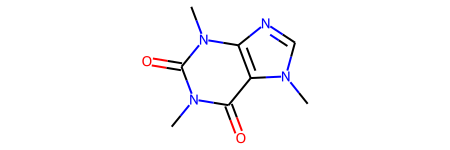

In [46]:
# Here we define a coffeine molecule using Smiles.
mol_coffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C") 
mol_coffeine

Let us now take chirality into consideration.
For instance, consider [2-Butanol](https://en.wikipedia.org/wiki/2-Butanol).
The molecule has two configurations that are mirror images of each other (also called **enantiomer**). For more information and a 3D visualization, we refer to [this tutorial](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules).

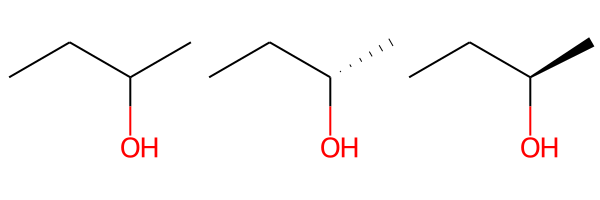

In [47]:
mol1 = Chem.MolFromSmiles("CC[CH](C)O")  # without chiral information
mol2 = Chem.MolFromSmiles("CC[C@H](C)O") # enantiomer 1
mol3 = Chem.MolFromSmiles("CC[C@@H](C)O") # enantiomer 2

Draw.MolsToGridImage([mol1, mol2, mol3], molsPerRow=3, subImgSize=(200, 200))


NGLViewer allows us to see a ball-and-stick visualization (example taken from [this](http://nglviewer.org/nglview/release/v0.6.1/api.html) tutorial).

In [16]:
m = Chem.AddHs(Chem.MolFromSmiles('CC[C@@H](C)O')) # TODO replace with caffeine
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view = nv.show_rdkit(m)
view

NGLWidget()

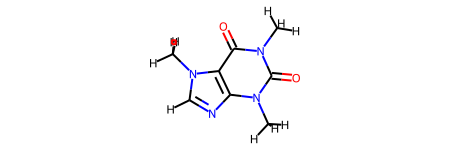

In [41]:
# or this ?? TODO

# create the caffeine molecule using RDKit
mol = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.UFFOptimizeMolecule(mol)

mol

# convert the molecule to a PDB file
#pdb = Chem.MolToPDBBlock(mol)

# create an instance of NGLView
#view = nglview.NGLWidget()

# load the caffeine molecule from the PDB file
#view.add_pdbid(pdb)

# display the molecule in the Jupyter notebook
#view


### Conformers

To generate conformers, we can use [Datamol](https://datamol.io/), a Python library that is a wrapper around RDKit to make it easier to use.

In [49]:
# generate conformers
mol = dm.conformers.generate(mol_coffeine, align_conformers=True)
# Get all conformers as a list
conformers = mol.GetConformers()

# print the x,y,z coordinates of the 24 atoms of the first conformer.
mol.GetConformer(0).GetPositions()

array([[-0.15171907, -0.13176966,  3.08119825],
       [ 0.05918091,  0.68092586,  1.87543287],
       [ 0.36717301,  1.99008168,  1.81987676],
       [ 0.4836087 ,  2.39431037,  0.53386461],
       [ 0.24650024,  1.32665042, -0.25762257],
       [-0.01493958,  0.27318787,  0.59597775],
       [-0.29313579, -0.95280392,  0.04010046],
       [-0.52976586, -1.90525734,  0.8267764 ],
       [-0.30089341, -1.08114649, -1.28812978],
       [-0.03873869, -0.0215015 , -2.09777132],
       [-0.05669789, -0.18814256, -3.35374419],
       [ 0.23778486,  1.19340475, -1.59697665],
       [ 0.51051001,  2.29082171, -2.50709236],
       [-0.59479963, -2.3773428 , -1.88985908]])

### Molecular graphs

A common tool to work with graphs is called **networkX**. We use it to create two isomorphic graphs.

Matrix 1:
 [[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]

Matrix 2:
 [[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]

And the corresponding graphs:



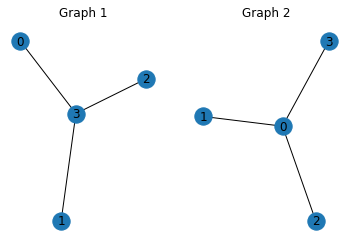

In [31]:
# create two adjacency matrices
adj_matrix_1 = np.array([[0,0,0,1],[0,0,0,1],[0,0,0,1],[1,1,1,0]])
adj_matrix_2 = np.array([[0,1,1,1],[1,0,0,0],[1,0,0,0],[1,0,0,0]])
print("Matrix 1:\n", adj_matrix_1)
print("\nMatrix 2:\n", adj_matrix_2)

# convert adjacency matrices to graphs
graph_1 = nx.from_numpy_matrix(adj_matrix_1)
graph_2 = nx.from_numpy_matrix(adj_matrix_2)

# draw
print("\nAnd the corresponding graphs:\n")
plt.subplot(1, 2, 1)
plt.title("Graph 1")
nx.draw(graph_1, with_labels = True)
plt.subplot(1, 2, 2)
plt.title("Graph 2")
nx.draw(graph_2, with_labels = True)

### Fingerprints

We can also use Datamol to easily create fingerprints. 

Number of elements:  2048
Types of entries:  {0, 1}
Number of Ones:  34


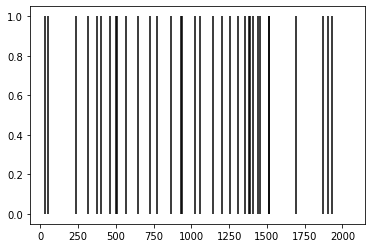

In [60]:
fp = dm.to_fp(mol_coffeine, fp_type='ecfp')  # dm.list_supported_fingerprints() lists the available options
print("Number of elements: ", fp.size)
print("Types of entries: ", set(list(fp)))
print("Number of Ones: ", np.count_nonzero(fp))
#plt.scatter(range(fp.size), list(fp))
plt.vlines([i for i in range(fp.size) if fp[i]>0.5], ymin=0, ymax=1)
plt.vlines(fp.size, ymin=0, ymax=0) # dummy to calibrate scale

Number of elements:  2048
Types of entries:  {0, 1}
Number of Ones:  759


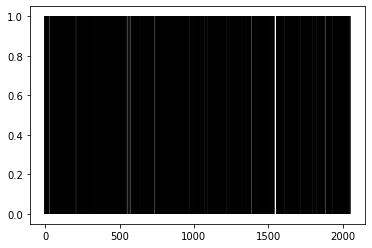

In [62]:
# The "rdkit" fingerprint is less sparse than ECFP
fp = dm.to_fp(mol_coffeine, fp_type='rdkit') 
print("Number of elements: ", fp.size)
print("Types of entries: ", set(list(fp)))
print("Number of Ones: ", np.count_nonzero(fp))
#plt.scatter(range(fp.size), list(fp))
plt.vlines([i for i in range(fp.size) if fp[i]>0.5], ymin=0, ymax=1)
plt.vlines(fp.size, ymin=0, ymax=0) # dummy to calibrate scale

## Discussion



We have discussed different methods for molecular representations:

*   A molecule is a bag of atoms (molecular formula).
*   A molecule is a labeled graph (molecular graphs).
*   A molecule is a graph, equipped with some 3D information (point clouds).
*   A molecule is a manipulable 3D object, e.g., with rotational bonds (conformers).

We have also learned that inter-molecular forces are typically only explicitly represented when they lead to a chemical bond (and sometimes not even then). Other forces might be implicitly be represented in the 3D configuration. 

We have not discussed methods that only consider the surface area of a molecule.

## Quiz

TODO